# **Insert Title Here**
**DATA103 S11 Group 4**
- GOZON, Jean Pauline D.
- JAMIAS, Gillian Nicole A.
- MARCELO Andrea Jean C. 
- REYES, Anton Gabriel G.
- VICENTE, Francheska Josefa

## Requirements and Imports

### Imports

**Basic Libraries**

* `numpy` contains a large collection of mathematical functions
* `pandas` contains functions that are designed for data manipulation and data analysis

In [1]:
import numpy as np
import pandas as pd
import datasets

**Natural Language Processing Libraries**
* `TFidfVectorizer` converts the given text documents into a matrix, which has TF-IDF features
* `CountVectorizer` converts the given text documents into a matrix, which has the counts of the tokens

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

**Machine Learning Libraries**

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

In [58]:
from sklearn.metrics import f1_score, roc_auc_score, hamming_loss, accuracy_score, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
import pickle

In [5]:
df = pd.read_csv ('cleaned_data_with_char_seq_removal.csv')
df

,class,text
0,0,"'Its not a viable option, and youll be leaving..."
1,1,'It can be hard to appreciate the notion that ...
2,1,"'Hi, so last night i was sitting on the ledge ..."
3,1,'I tried to kill my self once and failed badly...
4,1,'Hi NEM3030. What sorts of things do you enjoy...
...,...,...
242155,0,If you don't like rock then your not going to ...
242156,0,You how you can tell i have so many friends an...
242157,0,pee probably tastes like salty tea😏💦‼️ can som...
242158,1,The usual stuff you find hereI'm not posting t...


## Feature Engineering

In [6]:
main_directory = './saved_models/trad_ml/vectorizers/'

In [7]:
def save_vectorizers (vectorizer, vectorizer_name):
    vectorizer_filename = main_directory + vectorizer_name + '.pkl'
    
    with open(vectorizer_filename, 'wb') as file:
        pickle.dump(vectorizer, file)

### Splitting the Dataset into Train, Val, and Test Split

In [8]:
X = df ['text']
X

0         'Its not a viable option, and youll be leaving...
1         'It can be hard to appreciate the notion that ...
2         'Hi, so last night i was sitting on the ledge ...
3         'I tried to kill my self once and failed badly...
4         'Hi NEM3030. What sorts of things do you enjoy...
                                ...                        
242155    If you don't like rock then your not going to ...
242156    You how you can tell i have so many friends an...
242157    pee probably tastes like salty tea😏💦‼️ can som...
242158    The usual stuff you find hereI'm not posting t...
242159    I still haven't beaten the first boss in Hollo...
Name: text, Length: 242160, dtype: object

In [9]:
y = df ['class']
y

0         0
1         1
2         1
3         1
4         1
         ..
242155    0
242156    0
242157    0
242158    1
242159    0
Name: class, Length: 242160, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 42, 
                                                    shuffle = True)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, 
                                                  y_train, 
                                                  test_size = 0.1,
                                                  stratify = y_train,
                                                  random_state = 42, 
                                                  shuffle = True)

In [12]:
print('Train input  shape: ', X_train.shape)
print('Train output shape: ', y_train.shape)

Train input  shape:  (174355,)
Train output shape:  (174355,)


In [13]:
print('Val input  shape: ', X_val.shape)
print('Val output shape: ', y_val.shape)

Val input  shape:  (19373,)
Val output shape:  (19373,)


In [14]:
print('Test input  shape: ', X_test.shape)
print('Test output shape: ', y_test.shape)

Test input  shape:  (48432,)
Test output shape:  (48432,)


In [15]:
train_df = pd.concat([X_train, y_train], axis = 1).reset_index(drop = True)
train_df

,text,class
0,How do you explain to your family that you wer...,0
1,I DONT UNDERSTAND THE US DEBT WHO DO THEY OWE ...,0
2,FireIt’s been a bit but I still think of her a...,1
3,AITA for telling my wife (34F) that reddit agr...,0
4,Join among us SGGFIF Jesjeuejjejejeeieieijdjdj...,0
...,...,...
174350,"Fellow teenagers, I have been influenced by th...",0
174351,I felt like talkingSo I was just outside at 01...,1
174352,i am trying to but i just cant i have everythi...,1
174353,I just want my suffering to endAll I have hear...,1


In [16]:
val_df = pd.concat([X_val, y_val], axis = 1).reset_index(drop = True)
val_df

,text,class
0,Really down........just need some words of enc...,1
1,I’m not gonna buy a carThe day gets closer. I’...,1
2,Help me kill myself. Please. Please. Please.I’...,1
3,The only thing keeping me alive is the fact th...,1
4,"I'm not.I'm not the sweet, determined girl eve...",1
...,...,...
19368,when she says Hi! This post seems to be relate...,0
19369,I gotta go to school tmmr for orientation at 9...,0
19370,Hey lads! Can I get some help from y'all? So.....,0
19371,My birthday is this coming month and it will b...,1


In [17]:
test_df = pd.concat([X_test, y_test], axis = 1).reset_index(drop = True)
test_df

,text,class
0,I just felt myself snapI have to pretend to be...,1
1,Are you envious of something about the opposit...,0
2,"We get it. Men have problems, too. We never sa...",0
3,Happy Birthday to everyone having Birthday on ...,0
4,i cant deal with life any longer but ive tried...,1
...,...,...
48427,I just need to go for everyone's sakeI can't e...,1
48428,Hope is now goneI'm 17m and I'm considering ta...,1
48429,18f needs someone to talk toI understand if th...,1
48430,"Help mePlease someone help me, just pm me.\nI'...",1


### Tokenizing with TF-IDF Vectorizer

We create a `TfidfVectorizer` object.

In [18]:
tfidf_vectorizer = TfidfVectorizer()

In [19]:
save_vectorizers(tfidf_vectorizer, 'tfidf')

We make another vectorizer object that takes the top 5000 features.

In [20]:
tfidf_vectorizer_5000 = TfidfVectorizer(max_features = 5000)

In [21]:
save_vectorizers(tfidf_vectorizer_5000, 'tfidf_5000')

**Train Data**

In [25]:
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values.astype('U'))

In [26]:
tfidf_train_5000 = tfidf_vectorizer_5000.fit_transform(X_train.values.astype('U'))

**Validation Data**

In [27]:
tfidf_val = tfidf_vectorizer.transform(X_val.values.astype('U'))

In [28]:
tfidf_val_5000 = tfidf_vectorizer_5000.transform(X_val.values.astype('U'))

**Test Data**

In [29]:
tfidf_test = tfidf_vectorizer.transform(X_test.values.astype('U'))

In [30]:
tfidf_test_5000 = tfidf_vectorizer_5000.transform(X_test.values.astype('U'))

### Tokenizing with Count Vectorizer

We create a `CountVectorizer` object.

In [31]:
count_vectorizer = CountVectorizer()

In [32]:
save_vectorizers(count_vectorizer, 'count')

We make another vectorizer object that takes the top 5000 features.

In [33]:
count_vectorizer_5000 = CountVectorizer(max_features = 5000)

In [34]:
save_vectorizers(count_vectorizer_5000, 'count_5000')

**Train Data**

In [35]:
count_train = count_vectorizer.fit_transform(X_train.values.astype('U'))

In [36]:
count_train_5000 = count_vectorizer_5000.fit_transform(X_train.values.astype('U'))

**Validation Data**

In [37]:
count_val = count_vectorizer.transform(X_val.values.astype('U'))

In [38]:
count_val_5000 = count_vectorizer_5000.transform(X_val.values.astype('U'))

**Test Data**

In [39]:
count_test = count_vectorizer.transform(X_test.values.astype('U'))

In [40]:
count_test_500 = count_vectorizer.transform(X_test.values.astype('U'))

## Modeling and Evaluation

### Defining the Functions

In [41]:
main_directory = './saved_models/trad_ml/'

In [42]:
def save_models (model, model_name, vectorizer_name):
    curr_directory = main_directory + model_name + '/' + vectorizer_name + '/'
    
    model_filename = curr_directory + 'model' + '.pkl'
    
    with open(model_filename, 'wb') as file:
        pickle.dump(model, file)

In [43]:
def scores (y_true, y_pred):
    accuracy = accuracy_score(y_true = y_true, y_pred = y_pred) * 100
    f1_micro_average = f1_score(y_true = y_true, y_pred = y_pred, average = 'micro') * 100
    f1_macro_average = f1_score(y_true = y_true, y_pred = y_pred, average = 'macro') * 100
    hamming_loss_score = hamming_loss(y_true = y_true, y_pred = y_pred) * 100
    precision, recall, fscore, support = precision_recall_fscore_support(y_true, y_pred)
    
    return accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision * 100, recall * 100

In [44]:
def print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall):
    print('Accuracy: ', accuracy, '%')
    print('F1 Macro Average: ', f1_macro_average, '%')
    print('F1 Micro Average: ', f1_micro_average, '%')
    print('Hamming Loss: ', hamming_loss_score, '%')
    print('Precision: ', precision, '%')
    print('Recall: ', recall, '%')

In [45]:
def train_model(base_model, X_train, y_train, X_test, y_test, model_name, vectorizer_name):
    test_predictions = np.zeros((len(y_test), 1))   
                                                       
    model = base_model
    model.fit(X_train, y_train)   
    
    train_predictions = model.predict(X_train)                      
    accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_train, train_predictions)    
    print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall)

    test_predictions = model.predict(X_test)       
    
    save_models(model, model_name, vectorizer_name)
    
    return model, test_predictions

In [47]:
def tune_and_train_model(model, hyperparameters,
                         X_train, y_train, 
                         X_test, y_test, 
                         model_name, vectorizer_name,
                         scoring='accuracy', cv = 5):
    
    print('Tuning', str(model) + '...')
        
    model_cv = GridSearchCV(model, hyperparameters, cv = cv, scoring = scoring, n_jobs = -1)
    model_cv.fit(X_train, y_train)
        
    train_predictions = model_cv.predict(X_train)                              
    accuracy = accuracy_score(train_predictions, y_train)           
        
    test_predictions = model_cv.predict(X_test)               
    
    save_models(model_cv.best_estimator_, model_name, vectorizer_name)
    
    return model_cv.best_estimator_, test_predictions

### Declaration of Hyperparameter Space

In [48]:
lr_hp_space = [{
    'C' : [0.01, 0.1, 1, 10],
    'max_iter' : [50, 100, 300, 600, 900, 1100] 
}]

In [49]:
mnb_hp_space = [{
    'alpha' : [0.0001, 0.001, 0.1, 1, 10, 100, 1000],
    'fit_prior' : [True, False]
}]

In [50]:
rf_hp_space = [{
    'criterion' : ['gini', 'entropy'],
    'n_estimators' : [50, 100, 150],
    'min_samples_split' : [2, 4, 10, 15],
    'max_depth' : [None, 50, 100, 150],
    'max_leaf_nodes' : [None, 50, 75, 100]
}]

### Logistic Regression (TF-IDF Vectorizer)

#### Model Training 

In [51]:
log_reg = LogisticRegression(n_jobs = -1)

In [55]:
log_reg_tfidf, lr_test_predictions_tfidf = train_model (log_reg, 
                                                        tfidf_train, y_train, 
                                                        tfidf_test, y_test, 
                                                        'logreg', 'tfidf')

Accuracy:  94.2450747039087 %
F1 Macro Average:  94.24436286747675 %
F1 Micro Average:  94.2450747039087 %
Hamming Loss:  5.754925296091308 %


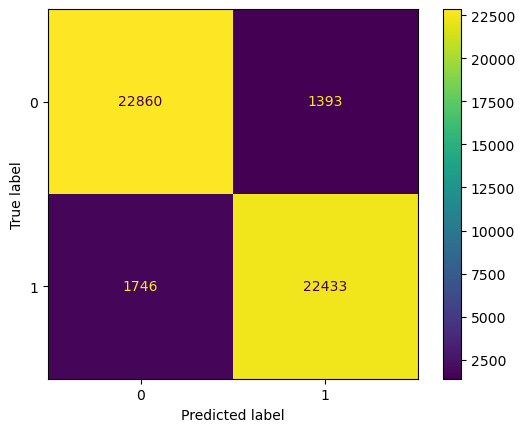

In [59]:
ConfusionMatrixDisplay(confusion_matrix(y_test, lr_test_predictions_tfidf)).plot()

In [60]:
accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_test, lr_test_predictions_tfidf)   
print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall)

Accuracy:  93.51874793524942 %
F1 Macro Average:  93.51824410572438 %
F1 Micro Average:  93.51874793524942 %
Hamming Loss:  6.481252064750579 %


#### Hyperparameter Tuning

In [ ]:
log_reg = LogisticRegression(n_jobs = -1)

In [ ]:
lr_tuned_model_tfidf, lr_tuned_test_predictions_tfidf = tune_and_train_model (log_reg, lr_hp_space, 
                                                                              tfidf_train, y_train, 
                                                                              tfidf_test, y_test,
                                                                              'logreg_tuned', 'tfidf')

In [ ]:
lr_tuned_model_tfidf

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, lr_tuned_test_predictions_tfidf)).plot()

#### Evaluation

In [ ]:
accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_test, lr_test_predictions_tfidf)    

temp_scores = {
    'Model' : 'Logistic Regression',
    'Vectorizer' : 'TF-IDF Vectorizer',
    'Accuracy' : accuracy,
    'F1 Micro Average' : f1_micro_average,
    'F1 Macro Average' : f1_macro_average,
    'Hamming Loss' : hamming_loss_score, 
    'Precision' : precision,
    'Recall' : recall
}  

scores_list.append(temp_scores)

print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall)

#### Feature Importance

### Logistic Regression (Count Vectorizer)

#### Model Training 

In [ ]:
log_reg = LogisticRegression(n_jobs = -1)

In [ ]:
log_reg_count, lr_test_predictions_count = train_model (log_reg, 
                                                        count_train, y_train, 
                                                        count_test, y_test, 
                                                        'logreg', 'count')

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, lr_test_predictions_count)).plot()

In [ ]:
accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_test, lr_test_predictions_count)   
print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall)

#### Hyperparameter Tuning

In [ ]:
log_reg = LogisticRegression(n_jobs = -1)

In [ ]:
lr_tuned_model_count, lr_tuned_test_predictions_count = tune_and_train_model (log_reg, lr_hp_space, 
                                                                              count_train, y_train, 
                                                                              count_test, y_test,
                                                                              'logreg_tuned', 'count')

In [ ]:
lr_tuned_model_count

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, lr_tuned_test_predictions_count)).plot()

#### Evaluation

In [ ]:
accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_test, lr_test_predictions_count)    

temp_scores = {
    'Model' : 'Logistic Regression',
    'Vectorizer' : 'Count Vectorizer',
    'Accuracy' : accuracy,
    'F1 Micro Average' : f1_micro_average,
    'F1 Macro Average' : f1_macro_average,
    'Hamming Loss' : hamming_loss_score,
    'Precision' : precision,
    'Recall' : recall
}  

scores_list.append(temp_scores)

print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall)

#### Feature Importance

### Multinomial Naive Bayes (TF-IDF Vectorizer)

#### Model Training 

In [ ]:
multinomial_nb = MultinomialNB ()

In [ ]:
mnb_tfidf, mnb_test_predictions_tfidf = train_model (multinomial_nb, 
                                                     tfidf_train, y_train, 
                                                     tfidf_test, y_test, 
                                                     'mnb', 'tfidf')

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, mnb_test_predictions_tfidf)).plot()

In [ ]:
accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_test, mnb_test_predictions_tfidf)   
print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall)

#### Hyperparameter Tuning

In [ ]:
multinomial_nb = MultinomialNB ()

In [ ]:
mnb_tuned_model_tfidf, mnb_tuned_test_predictions_tfidf = tune_and_train_model (multinomial_nb, mnb_hp_space, 
                                                                                tfidf_train, y_train, 
                                                                                tfidf_test, y_test,
                                                                                'mnb_tuned', 'tfidf')

In [ ]:
mnb_tuned_model_tfidf

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, mnb_tuned_test_predictions_tfidf)).plot()

#### Evaluation

In [ ]:
accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_test, mnb_test_predictions_tfidf)    

temp_scores = {
    'Model' : 'Multinomial Naive Bayes',
    'Vectorizer' : 'TF-IDF Vectorizer',
    'Accuracy' : accuracy,
    'F1 Micro Average' : f1_micro_average,
    'F1 Macro Average' : f1_macro_average,
    'Hamming Loss' : hamming_loss_score,
    'Precision' : precision,
    'Recall' : recall
}  

scores_list.append(temp_scores)

print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall)

#### Feature Importance

### Multinomial Naive Bayes (Count Vectorizer)


#### Model Training 

In [ ]:
multinomial_nb = MultinomialNB ()

In [ ]:
mnb_count, mnb_test_predictions_count = train_model (multinomial_nb, 
                                                     count_train, y_train, 
                                                     count_test, y_test, 
                                                     'mnb', 'count')

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, mnb_test_predictions_count)).plot()

In [ ]:
accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_test, mnb_test_predictions_count)   
print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall)

#### Hyperparameter Tuning

In [ ]:
multinomial_nb = MultinomialNB ()

In [ ]:
mnb_tuned_model_count, mnb_tuned_test_predictions_count = tune_and_train_model (multinomial_nb, mnb_hp_space, 
                                                                                count_train, y_train, 
                                                                                count_test, y_test,
                                                                                'mnb_tuned', 'count')

In [ ]:
mnb_tuned_model_count

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, mnb_tuned_test_predictions_count)).plot()

#### Evaluation

In [ ]:
accuracy, f1_micro_average, f1_macro_average, hamming_loss_score = scores (y_test, mnb_test_predictions_count)    

temp_scores = {
    'Model' : 'Multinomial Naive Bayes',
    'Vectorizer' : 'Count Vectorizer',
    'Accuracy' : accuracy,
    'F1 Micro Average' : f1_micro_average,
    'F1 Macro Average' : f1_macro_average,
    'Hamming Loss' : hamming_loss_score,
    'Precision' : precision,
    'Recall' : recall
}  

scores_list.append(temp_scores)

print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall)

#### Feature Importance

### Random Forest Classifier (TF-IDF Vectorizer)

#### Model Training 

In [ ]:
rf_classifier = RandomForestClassifier(n_jobs = -1)

In [ ]:
rf_tfidf, rf_test_predictions_tfidf = train_model (rf_classifier,
                                                   tfidf_train, y_train, 
                                                   tfidf_test, y_test, 
                                                   'rf', 'tfidf')

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, rf_test_predictions_tfidf)).plot()

In [ ]:
accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_test, rf_test_predictions_tfidf)   
print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall)

#### Hyperparameter Tuning

In [ ]:
rf_classifier = RandomForestClassifier(n_jobs = -1)

In [ ]:
rf_tuned_model_tfidf, rf_tuned_test_predictions_tfidf = tune_and_train_model (rf_classifier, rf_hp_space, 
                                                                              tfidf_train, y_train,
                                                                              tfidf_test, y_test,
                                                                              'rf_tuned', 'tfidf')

In [ ]:
rf_tuned_model_tfidf

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, rf_tuned_test_predictions_tfidf)).plot()

#### Evaluation

In [ ]:
accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_test, rf_test_predictions_tfidf)    

temp_scores = {
    'Model' : 'Random Forest Classifier',
    'Vectorizer' : 'TF-IDF Vectorizer',
    'Accuracy' : accuracy,
    'F1 Micro Average' : f1_micro_average,
    'F1 Macro Average' : f1_macro_average,
    'Hamming Loss' : hamming_loss_score,
    'Precision' : precision,
    'Recall' : recall
}  

scores_list.append(temp_scores)

print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall)

#### Feature Importance

### Random Forest Classifier (Count Vectorizer)

#### Model Training 

In [ ]:
rf_classifier = RandomForestClassifier(n_jobs = -1)

In [ ]:
rf_count, rf_test_predictions_count = train_model (rf_classifier,
                                                   count_train, y_train, 
                                                   count_test, y_test, 
                                                   'rf', 'count')

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, rf_test_predictions_count)).plot()

In [ ]:
accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_test, rf_test_predictions_count)   
print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall)

#### Hyperparameter Tuning

In [ ]:
rf_classifier = RandomForestClassifier(n_jobs = -1)

In [ ]:
rf_tuned_model_count, rf_tuned_test_predictions_count = tune_and_train_model (rf_classifier, rf_hp_space, 
                                                                              count_train, y_train,
                                                                              count_test, y_test,
                                                                              'rf_tuned', 'count')

In [ ]:
rf_tuned_model_count

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, rf_tuned_test_predictions_count)).plot()

#### Evaluation

In [ ]:
accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall = scores (y_test, rf_test_predictions_count)    

temp_scores = {
    'Model' : 'Random Forest Classifier',
    'Vectorizer' : 'Count Vectorizer',
    'Accuracy' : accuracy,
    'F1 Micro Average' : f1_micro_average,
    'F1 Macro Average' : f1_macro_average,
    'Hamming Loss' : hamming_loss_score,
    'Precision' : precision,
    'Recall' : recall
}  

scores_list.append(temp_scores)

print_scores (accuracy, f1_micro_average, f1_macro_average, hamming_loss_score, precision, recall)

#### Feature Importance

## Summary of Model Scores

In [ ]:
pd.DataFrame(scores_list).sort_values(['Accuracy', 'F1 Micro Average', 'F1 Macro Average', 'Hamming Loss'], ascending = False).reset_index(drop = True)